In [1]:
import numpy as np
import pandas as pd

In [2]:
# 1.a
I1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])
I2 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
])
I3 = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
])
I4 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]
])

In [3]:
# Vectorize the images
images = [I1, I2, I3, I4]
vectors = [img.flatten() for img in images]

In [4]:
vectors

[array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0])]

In [5]:
n = len(vectors)
d2 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        diff = vectors[i] - vectors[j]
        d2[i, j] = np.dot(diff, diff)

# Gaussian kernel: k(x, y) = exp(-||x-y||^2 / 2)
K = np.exp(-d2 / 2)

In [6]:
K_df = pd.DataFrame(K, index=[f"I{i+1}" for i in range(n)], columns=[f"I{j+1}" for j in range(n)])

In [7]:
K_df

,I1,I2,I3,I4
I1,1.000000,0.030197,0.018316,0.082085
I2,0.030197,1.000000,0.082085,0.049787
I3,0.018316,0.082085,1.000000,0.004087
I4,0.082085,0.049787,0.004087,1.000000


In [11]:
#1.c
def get_shifts(img):
    right_shift = img[:, :-1].flatten()  # drop far right column
    left_shift  = img[:, 1:].flatten()   # drop far left column
    return right_shift, left_shift

In [ ]:
# list comprehension shenanigans
shifted = [get_shifts(img) for img in images]

In [ ]:
# regular gaussian kernel
def kG(u, v):
    d2 = np.dot(u - v, u - v)
    return np.exp(-d2 / 2)


In [ ]:
n = len(images)
K_shift = np.zeros((n, n))
# for ever image
for i in range(n):
    # get the shifted images
    r_i, l_i = shifted[i]
    # for every shifted imag
    for j in range(n):
        # get the actual shifts
        r_j, l_j = shifted[j]
        # and compute by getting the similarity of the 4 combinations
        # interesting to note that by adding more shifts, combinations would
        # increase exponentially, and so the kernel would be more expensive
        # i think
        K_shift[i, j] = (
            kG(r_i, r_j) +
            kG(l_i, l_j) +
            kG(r_i, l_j) +
            kG(l_i, r_j)
        )


In [ ]:
K_shift_df = pd.DataFrame(
    np.round(K_shift, 6),
    index=[f"I{i+1}" for i in range(n)],
    columns=[f"I{j+1}" for j in range(n)]
)
K_shift_df

,I1,I2,I3,I4
I1,2.036631,0.224565,1.130598,0.198454
I2,0.224565,2.099574,0.498477,1.149361
I3,1.130598,0.498477,2.164170,0.122803
I4,0.198454,1.149361,0.122803,2.099574


In [40]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [245]:
cities = []
dist_matrix = []

with open('UScities.txt') as f:
    for line in f:
        tokens = line.strip().split()
        dists = list(map(float, tokens[-20:]))
        city = ' '.join(tokens[:-20])
        cities.append(city)
        dist_matrix.append(dists)



In [264]:
D = np.array(dist_matrix)


In [265]:
import random
r = 0.2
for i in range(n):
    for j in range(i+1, n):
        factor = np.random.uniform(1-r, 1+r)
        new_dist = D[i, j] * factor
        D[i, j] = D[j, i] = new_dist

In [266]:
D2 = D ** 2
n = D2.shape[0]

In [267]:
# squared distance from city i to city 1
d = D2[:, 0]

In [268]:
# build the matrix 
XXT = 0.5 * (d[:, None] + d[None, :] - D2)

In [269]:
# Perform SVD
U, S, Vt = svd(XXT)

In [270]:
# top 2
U_k = U[:, :2]
S_k = S[:2]
# Vt_k = Vt[:2, :]

In [271]:
Z_plot = U_k * np.sqrt(S_k)
# fix plot direction
Z_plot[:, 1] *= -1

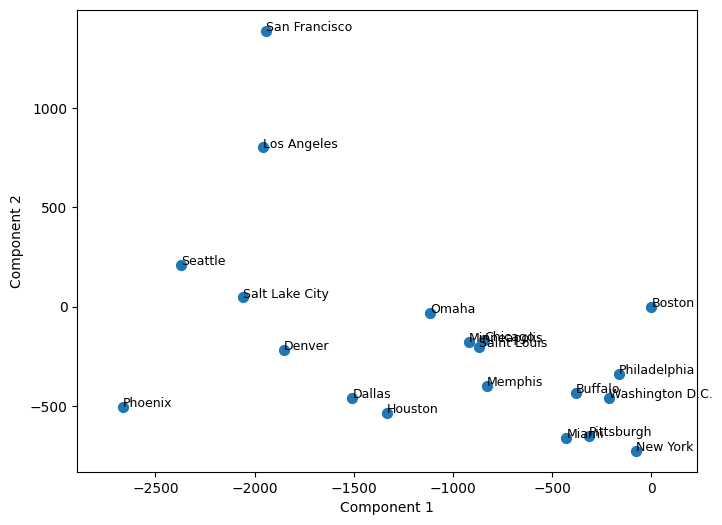

In [272]:
plt.figure(figsize=(8, 6))
plt.scatter(Z_plot[:, 0], Z_plot[:, 1], s=50)
for i, city in enumerate(cities):
    plt.text(Z_plot[i, 0], Z_plot[i, 1], city, fontsize=9)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.axis('equal')
plt.show()
